Задача 4 про лимфому

In [1]:
import numpy as np
import pandas as pd

In [2]:
life=np.array([49, 58, 75, 110, 112, 132, 151, 276, 281, 362])

In [3]:
np.median(life)

122.0

In [4]:
from scipy import stats
from statsmodels.stats.descriptivestats import sign_test
from statsmodels.stats.weightstats import zconfint

In [6]:
%matplotlib inline

In [7]:
from matplotlib import pyplot as plt

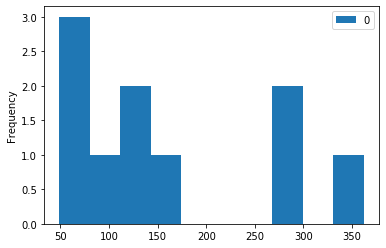

In [10]:
pd.DataFrame(life).plot.hist()
plt.show()

In [11]:
m0 = 200
stats.wilcoxon(life - m0)

WilcoxonResult(statistic=17.0, pvalue=0.2845026979112075)

Задача 5 про Борнео

In [12]:
les1=np.array([22,22,15,13,19,19,18,20,21,13,13,15])
les2=np.array([17,18,18,15,12,4,14,15,10])

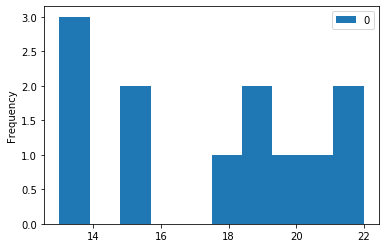

In [14]:
pd.DataFrame(les1).plot.hist();

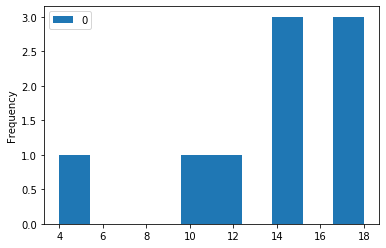

In [15]:
pd.DataFrame(les2).plot.hist();

In [19]:
stats.mannwhitneyu(les1, les2, alternative='greater')

MannwhitneyuResult(statistic=81.0, pvalue=0.02900499272087373)

Задача 6 про Челенджер

In [22]:
data=pd.read_csv('challenger.txt', sep='\t')

In [24]:
data

,Unnamed: 0,Temperature,Incident
0,Apr12.81,18.9,0
1,Nov12.81,21.1,1
2,Mar22.82,20.6,0
3,Nov11.82,20.0,0
4,Apr04.83,19.4,0
5,Jun18.83,22.2,0
6,Aug30.83,22.8,0
7,Nov28.83,21.1,0
8,Feb03.84,13.9,1
9,Apr06.84,17.2,1


In [25]:
incident = data[data['Incident']  == 1].Temperature
no_incident = data[data['Incident']  == 0].Temperature

In [27]:
from matplotlib import pylab

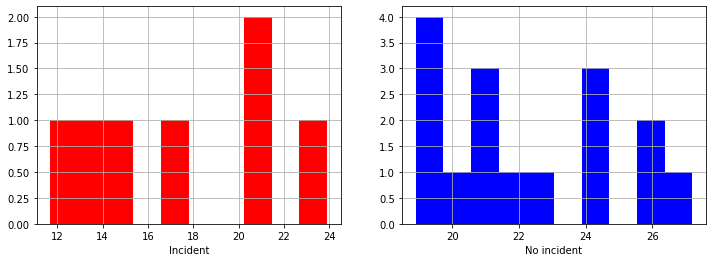

In [28]:
pylab.figure(figsize=(12,4))

pylab.subplot(1,2,1)
pylab.grid()
pylab.hist(incident, color = 'r')
pylab.xlabel('Incident')

pylab.subplot(1,2,2)
pylab.grid()
pylab.hist(no_incident, color = 'b')
pylab.xlabel('No incident')

pylab.show()

In [29]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

In [35]:
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [43]:
np.array(incident)

array([21.1, 13.9, 17.2, 21.1, 11.7, 23.9, 14.4])

In [44]:
np.random.seed(0)

no_means = list(map(np.mean, get_bootstrap_samples(np.array(no_incident), 1000)))
yes_means = list(map(np.mean, get_bootstrap_samples(np.array(incident), 1000)))

print("95% confidence interval for the incident mean temperature:",  stat_intervals(no_means, 0.05))
print("95% confidence interval for the no incident mean temperature:",  stat_intervals(yes_means, 0.05))

95% confidence interval for the incident mean temperature: [21.06875  23.575625]
95% confidence interval for the no incident mean temperature: [14.5125     20.71607143]


In [46]:
type(yes_means)

list

In [47]:
print("95% confidence interval for difference in mean temperatures:",  stat_intervals(np.array(no_means)-np.array(yes_means),
                                                                                      0.05))

95% confidence interval for difference in mean temperatures: [1.42299107 7.93861607]


Задача 7 - перестановочный критерий

In [48]:
def permutation_t_stat_ind(sample1, sample2):
    return np.mean(sample1) - np.mean(sample2)

In [49]:
def get_random_combinations(n1, n2, max_combinations):
    index = list(range(n1 + n2))
    indices = set([tuple(index)])
    for i in range(max_combinations - 1):
        np.random.shuffle(index)
        indices.add(tuple(index))
    return [(index[:n1], index[n1:]) for index in indices]

In [50]:
def permutation_zero_dist_ind(sample1, sample2, max_combinations = None):
    joined_sample = np.hstack((sample1, sample2))
    n1 = len(sample1)
    n = len(joined_sample)
    
    if max_combinations:
        indices = get_random_combinations(n1, len(sample2), max_combinations)
    else:
        indices = [(list(index), list(filter(lambda i: i not in index, range(n)))) \
                    for index in itertools.combinations(range(n), n1)]
    
    distr = [joined_sample[list(i[0])].mean() - joined_sample[list(i[1])].mean() \
             for i in indices]
    return distr

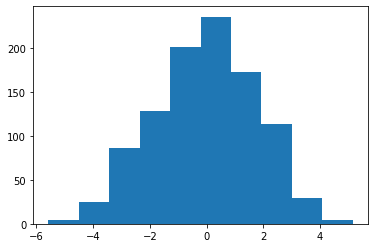

In [51]:
pylab.hist(permutation_zero_dist_ind(incident, no_incident, max_combinations = 1000))
pylab.show()

In [52]:
def permutation_test(sample, mean, max_permutations = None, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    t_stat = permutation_t_stat_ind(sample, mean)
    
    zero_distr = permutation_zero_dist_ind(sample, mean, max_permutations)
    
    if alternative == 'two-sided':
        return sum([1. if abs(x) >= abs(t_stat) else 0. for x in zero_distr]) / len(zero_distr)
    
    if alternative == 'less':
        return sum([1. if x <= t_stat else 0. for x in zero_distr]) / len(zero_distr)

    if alternative == 'greater':
        return sum([1. if x >= t_stat else 0. for x in zero_distr]) / len(zero_distr)

In [53]:
print("p-value: %f" % permutation_test(no_incident, incident, max_permutations = 10000))

p-value: 0.006200
